<a href="https://colab.research.google.com/github/RodrigodeFeo/8DTS/blob/main/SNR_Prototipo_Rec_Fundos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ipywidgets pandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.4 MB/s eta 0:00:00


Selecione o perfil de investidor:
1. Conservador
2. Moderado
3. Arrojado
Escolha o perfil de investidor (digite o número correspondente): 3
Informe o valor do aporte: 10000

Selecione o prazo para investimento:
1. Curto prazo
2. Médio prazo
3. Longo prazo
Escolha o prazo para investimento (digite o número correspondente): 2

Selecione o motivo do investimento:
1. Aposentadoria
2. Compra de imóvel
3. Educação dos filhos
4. Outros
Escolha o motivo do investimento (digite o número correspondente): 1


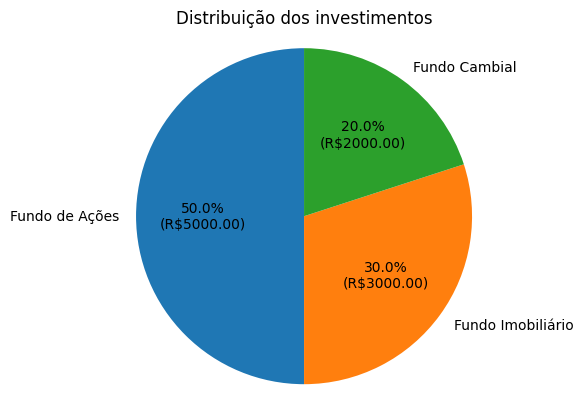

In [28]:
import matplotlib.pyplot as plt

# Função para plotar o gráfico de pizza
def plotar_grafico(labels, sizes):
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct=lambda p: f'{p:.1f}%\n(R${sum(sizes) * p / 100:.2f})', startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title('Distribuição dos investimentos')
    plt.show()

# Função para recomendar a distribuição do aporte em fundos de investimento
def recomendar_aplicacao(perfil, aporte):
    # Dicionário com os pesos dos fundos simulados para cada perfil de investidor
    pesos = {
        "Conservador": {"Fundo de Renda Fixa": 0.6, "Fundo de CDB": 0.3, "Fundo de Tesouro Direto": 0.1},
        "Moderado": {"Fundo Multimercado": 0.4, "Fundo de Ações": 0.3, "Fundo de CDB": 0.2, "Fundo de LCI": 0.1},
        "Arrojado": {"Fundo de Ações": 0.5, "Fundo Imobiliário": 0.3, "Fundo Cambial": 0.2}
    }

    # Obtendo a distribuição de ativos conforme o perfil selecionado
    distribuicao = pesos[perfil]

    # Obtendo os valores dos investimentos com base no aporte total
    valores = [distribuicao[fundo] * aporte for fundo in distribuicao]

    # Plotando o gráfico de pizza com a distribuição dos investimentos recomendados
    plotar_grafico(distribuicao.keys(), valores)

# Interface para receber as informações do usuário
def interface():
    # Opções disponíveis para perfil de investidor, prazo e motivo
    perfis = ["Conservador", "Moderado", "Arrojado"]
    prazos = ["Curto prazo", "Médio prazo", "Longo prazo"]
    motivos = ["Aposentadoria", "Compra de imóvel", "Educação dos filhos", "Outros"]

    # Solicitando as informações do usuário
    print("Selecione o perfil de investidor:")
    for i, perfil in enumerate(perfis):
        print(f"{i + 1}. {perfil}")

    perfil_index = int(input("Escolha o perfil de investidor (digite o número correspondente): ")) - 1
    perfil = perfis[perfil_index]

    aporte = float(input("Informe o valor do aporte: "))

    print("\nSelecione o prazo para investimento:")
    for i, prazo in enumerate(prazos):
        print(f"{i + 1}. {prazo}")

    prazo_index = int(input("Escolha o prazo para investimento (digite o número correspondente): ")) - 1
    prazo = prazos[prazo_index]

    print("\nSelecione o motivo do investimento:")
    for i, motivo in enumerate(motivos):
        print(f"{i + 1}. {motivo}")

    motivo_index = int(input("Escolha o motivo do investimento (digite o número correspondente): ")) - 1
    motivo = motivos[motivo_index]

    # Chamando a função para recomendar a distribuição do aporte
    recomendar_aplicacao(perfil, aporte)

# Chamando a interface
interface()
